In [9]:
# # Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [10]:
# install joblib. This will be used to save your model. 
# # Restart your kernel after installing 
# !pip install joblib

In [11]:
# !pip install xgboost

In [1]:
# Import the dependencies
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter('ignore', FutureWarning)
pd.set_option('mode.chained_assignment', None)

In [2]:
# Import the dependencies
from sklearn.metrics import plot_confusion_matrix

In [3]:
# import csv into a dataframe
data_read = pd.read_csv("../Resources/fraudTrain.csv")
data_read

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [4]:
data_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
data_read.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


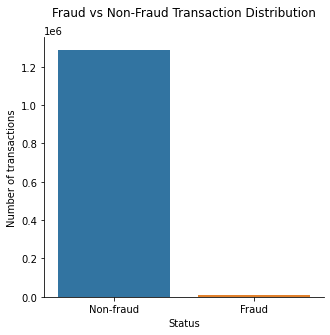

In [11]:
fig = sns.catplot('is_fraud', data=data_read, kind='count', height=4.5, aspect=1)
plt.title("Fraud vs Non-Fraud Transaction Distribution\n")
plt.savefig("../static/images/distribution.jpg", bbox_inches='tight')
plt.ylabel("Number of transactions")
plt.xlabel("Status")
fig.set_xticklabels(['Non-fraud', 'Fraud'])
plt.show()

In [32]:
# ax1 = sns.boxplot(x="is_fraud", y="amt", data=data_read)
# ax2 = sns.boxplot(x="is_fraud", y="amt", data=data_fraud)

In [19]:
data_notfraud = data_read[data_read.is_fraud==0]
data_fraud = data_read[data_read.is_fraud==1]

data_notfraud.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1289169.0
mean,6.484732e+05,4.172901e+17,6.766711e+01,4.880511e+04,3.853689e+01,-9.022814e+01,8.877523e+04,1.349249e+09,3.853666e+01,-9.022827e+01,0.0
std,3.741526e+05,1.308990e+18,1.540080e+02,2.689099e+04,5.075234e+00,1.375598e+01,3.018065e+05,1.283514e+07,5.109144e+00,1.376794e+01,0.0
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.0
25%,3.246100e+05,1.800429e+14,9.610000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338759e+09,3.473145e+01,-9.689853e+01,0.0
50%,6.484110e+05,3.521417e+15,4.728000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349254e+09,3.936528e+01,-8.744091e+01,0.0
75%,9.723990e+05,4.642255e+15,8.254000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359378e+09,4.195705e+01,-8.023853e+01,0.0
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.568990e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.668291e+01,-6.695090e+01,0.0


In [25]:
data_fraud.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age
count,7.506000e+03,7.506000e+03,7506.000000,7506.000000,7506.000000,7506.000000,7.506000e+03,7.506000e+03,7506.000000,7506.000000,7506.0,7506.000000
mean,6.249497e+05,4.003577e+17,531.320092,48038.714229,38.663609,-89.916041,9.727676e+04,1.348389e+09,38.653901,-89.915808,1.0,49.662936
std,4.010560e+05,1.276871e+18,390.560070,27265.558212,5.172289,14.278221,3.265815e+05,1.383020e+07,5.218387,14.298685,0.0,18.837944
min,2.449000e+03,6.041621e+10,1.060000,1330.000000,20.027100,-165.672300,2.300000e+01,1.325466e+09,19.425114,-166.550779,1.0,16.000000
25%,2.398565e+05,1.800429e+14,245.662500,24927.000000,35.056100,-96.701000,7.465000e+02,1.335744e+09,35.114671,-96.671038,1.0,34.000000
50%,6.381620e+05,3.528041e+15,396.505000,46290.000000,39.433600,-86.691900,2.623000e+03,1.348872e+09,39.427008,-86.813044,1.0,49.000000
75%,9.849215e+05,4.651007e+15,900.875000,71107.000000,42.073175,-79.941600,2.143700e+04,1.360021e+09,41.986902,-79.907096,1.0,62.000000
max,1.295733e+06,4.992346e+18,1376.040000,99783.000000,66.693300,-68.556500,2.906700e+06,1.371787e+09,67.510267,-67.569238,1.0,95.000000


In [4]:
min(data_read["trans_date_trans_time"]), max(data_read["trans_date_trans_time"])

('2019-01-01 00:00:18', '2020-06-21 12:13:37')

In [5]:
# Convert the date of birth into numeric as age
data_train = data_read
data_train['dob']= pd.to_datetime(data_train['dob'])
data_train['dob']

from datetime import datetime
today = datetime.today()
data_train['age'] = round(data_train['dob'].apply(lambda x: (today - x).days//365.25),0)
data_train['age']

0          32.0
1          42.0
2          59.0
3          54.0
4          34.0
           ... 
1296670    59.0
1296671    41.0
1296672    53.0
1296673    40.0
1296674    25.0
Name: age, Length: 1296675, dtype: float64

In [6]:
# Display the dataframe column names
data_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'age'],
      dtype='object')

In [7]:
# Select the columns which are required for the further processing
data_train = data_train[["category", "cc_num", "amt", "lat","long", "job", "age", "trans_num", 
                         "unix_time", "merch_lat","merch_long", "is_fraud"]]
data_train.head()

,category,cc_num,amt,lat,long,job,age,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,misc_net,2703186189652095,4.97,36.0788,-81.1781,"Psychologist, counselling",32.0,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,grocery_pos,630423337322,107.23,48.8878,-118.2105,Special educational needs teacher,42.0,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,entertainment,38859492057661,220.11,42.1808,-112.2620,Nature conservation officer,59.0,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,gas_transport,3534093764340240,45.00,46.2306,-112.1138,Patent attorney,54.0,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,misc_pos,375534208663984,41.96,38.4207,-79.4629,Dance movement psychotherapist,34.0,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### One Hot Encoding

In [8]:
# Encode the transaction number and convert into numeric
from sklearn.preprocessing import LabelEncoder

get_transnum = data_train['trans_num']
label_encoder = LabelEncoder()
label_encoder.fit(get_transnum)
encoded_transnum = label_encoder.transform(get_transnum)
data_train['trans_num'] = encoded_transnum

In [9]:
# Encode the category and convert into numeric
get_category = data_train['category']
label_encoder = LabelEncoder()
label_encoder.fit(get_category)
encoded_category = label_encoder.transform(get_category)
data_train['category'] = encoded_category

In [10]:
# Encode the job and convert into numeric
get_job = data_train['job']
label_encoder = LabelEncoder()
label_encoder.fit(get_job)
encoded_job = label_encoder.transform(get_job)
data_train['job'] = encoded_job

In [11]:
# Define the features
selected_features = data_train.drop('is_fraud', axis=1)

# sets y to is_fraud
target = data_read["is_fraud"].values.reshape(-1, 1)

In [12]:
selected_features

,category,cc_num,amt,lat,long,job,age,trans_num,unix_time,merch_lat,merch_long
0,8,2703186189652095,4.97,36.0788,-81.1781,370,32.0,56438,1325376018,36.011293,-82.048315
1,4,630423337322,107.23,48.8878,-118.2105,428,42.0,159395,1325376044,49.159047,-118.186462
2,0,38859492057661,220.11,42.1808,-112.2620,307,59.0,818703,1325376051,43.150704,-112.154481
3,2,3534093764340240,45.00,46.2306,-112.1138,328,54.0,544575,1325376076,47.034331,-112.561071
4,9,375534208663984,41.96,38.4207,-79.4629,116,34.0,831111,1325376186,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...,...,...
1296670,0,30263540414123,15.56,37.7175,-112.4777,215,59.0,344658,1371816728,36.841266,-111.690765
1296671,1,6011149206456997,51.70,39.2667,-77.5101,360,41.0,199896,1371816739,38.906881,-78.246528
1296672,1,3514865930894695,105.93,32.9396,-105.8189,308,53.0,366013,1371816752,33.619513,-105.130529
1296673,1,2720012583106919,74.90,43.3526,-102.5411,485,40.0,1086299,1371816816,42.788940,-103.241160


## Split and Scale the data

In [24]:
# Import the dependecnies
from sklearn.model_selection import train_test_split

# Split the selected dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, random_state=42)

In [25]:
# X_train.to_csv("../exporteddata/correlation.csv")

In [26]:
# Scale the train & test datasets
from sklearn.preprocessing import StandardScaler

# Create a standard scaler model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

# Transform the scaled data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Random Forest Classifier

In [27]:
# Use the Random Forest Classifier Model to get the feature importance/weightage
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

# Fit the random forest model to X and y
rf = rf.fit(X_train_scaled, y_train)

# Return the importance of each column to predicting the outcomes
importances = rf.feature_importances_
importances

C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([0.19890322, 0.03216939, 0.40772   , 0.03493436, 0.03293427,
       0.03603119, 0.04209191, 0.04849949, 0.06442959, 0.05125602,
       0.05103057])

In [28]:
# Sort each column in order of importance
rf_weights = sorted(zip(importances, selected_features.keys()), reverse=True)
rf_weights

[(0.4077199959832378, 'amt'),
 (0.19890321798196767, 'category'),
 (0.06442958651790455, 'unix_time'),
 (0.05125602140323649, 'merch_lat'),
 (0.0510305684944586, 'merch_long'),
 (0.04849949055963992, 'trans_num'),
 (0.04209191210547553, 'age'),
 (0.03603118815909087, 'job'),
 (0.03493436240109091, 'lat'),
 (0.03293426811720557, 'long'),
 (0.03216938827669218, 'cc_num')]

In [29]:
# Convert the weighted feature list into a dataframe
rf_weighted_df = pd.DataFrame(rf_weights)
rf_weighted_df

,0,1
0,0.407720,amt
1,0.198903,category
2,0.064430,unix_time
3,0.051256,merch_lat
4,0.051031,merch_long
5,0.048499,trans_num
6,0.042092,age
7,0.036031,job
8,0.034934,lat
9,0.032934,long


In [30]:
# Save the dataframe into a csv file for plotting
rf_weighted_df.to_csv("../exporteddata/random_forest.csv")

In [31]:
### Plot the random forest features

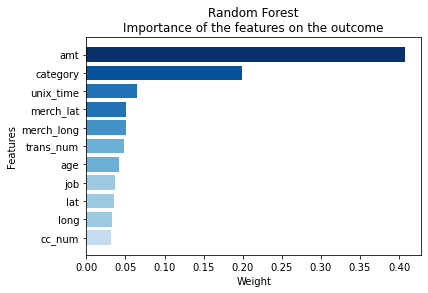

In [48]:
colors = ['#c6dbef','#9ecae1','#9ecae1','#9ecae1','#6baed6','#6baed6','#4292c6','#2171b5','#2171b5','#08519c','#08306b','#023858']
sorted_idx = importances.argsort()
# plt.barh(selected_features.columns[sorted_idx], importances[sorted_idx], color=['#FFFFCC',#D9F0A3','#ADDD8E','#78C679','#31A354','#006837'])
plt.barh(selected_features.columns[sorted_idx], importances[sorted_idx], color=colors)

plt.title("Random Forest\nImportance of the features on the outcome")
plt.ylabel("Features", fontsize=10)
plt.xlabel("Weight", fontsize=10)
plt.savefig("../static/images/randomforest.jpg", bbox_inches='tight')
plt.show()

### Plot the histogram for the most weighted feature, Amount

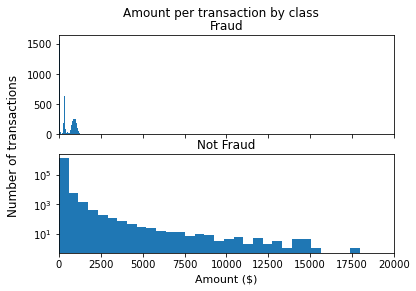

In [21]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

data_notfraud = data_train[data_train.is_fraud==0]
data_fraud = data_train[data_train.is_fraud==1]

bins = 50

ax1.hist(data_fraud.amt, bins = bins)
ax1.set_title('Fraud')
# ax1.set_ylabel("Num of Transactions")

ax2.hist(data_notfraud.amt, bins = bins)
ax2.set_title('Not Fraud')
# ax2.set_ylabel('Num of Transactions')

plt.xlabel('Amount ($)', fontsize=11)
f.text(.02, .5, 'Number of transactions', ha='center', va='center', rotation='vertical', fontsize=12)

plt.xlim((0, 20000))
plt.yscale('log')
plt.savefig("../static/images/histogram.jpg",  bbox_inches='tight')
plt.show();

### Correlation Diagram

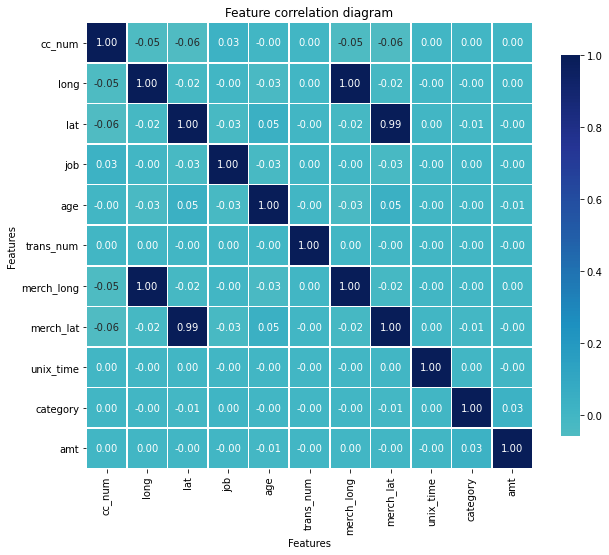

In [34]:
import seaborn as sns
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.title("Feature correlation diagram")
    plt.xlabel("Features")
    plt.ylabel("Features")
    plt.savefig("../static/images/correlation.jpg",  bbox_inches='tight')
    plt.show();

correlation_heatmap(X_train[selected_features.columns[sorted_idx]])


## Logistic Regression

In [35]:
# Import the dependencies for logistic regression model
from sklearn import set_config
from sklearn.linear_model import LogisticRegression

In [36]:
# Define logisitic regression model
logistic_regn_model = LogisticRegression()
set_config(print_changed_only=False)
print(logistic_regn_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [37]:
# Train the data with the logisitic regression model
logistic_regn_model.fit(X_train_scaled, y_train)

C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
# Print the training score for training and testing datasets
print(f"Training Data Score: {logistic_regn_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {logistic_regn_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9936411703372524
Testing Data Score: 0.9936545443888836


In [39]:
# Make predictions with the test data
lr_predictions = logistic_regn_model.predict(X_test_scaled)
print(f"First 10 Predictions:   {lr_predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")
print( np.unique(lr_predictions) )

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0]
First 10 Actual labels: [[0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]
[0 1]


### Gradient Boosting Regressor model

In [40]:
# fitting Gradient Boosting Regressor model to see accuracy
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

gradient = GradientBoostingRegressor(alpha=.01).fit(X_train_scaled, y_train)
predictions = gradient.predict(X_test_scaled)

MSE = mean_squared_error(y_test, predictions)
r2 = gradient.score(X_test_scaled, y_test)
print(f"MSE: {MSE}, R2: {r2}")

print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MSE: 0.002608787505812029, R2: 0.5484969616390025
First 10 Predictions:   [ 4.17784394e-04  1.97933655e-04  1.29839155e-03  3.79283098e-03
  1.59001528e-03 -8.00440440e-04  6.86418569e-04  2.92359604e-03
  7.31882945e-04 -7.47385369e-05]
First 10 Actual labels: [[0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]


In [42]:
print(predictions)

[0.00041778 0.00019793 0.00129839 ... 0.00137407 0.00159002 0.00101089]


### XGBoost Model

In [43]:
from xgboost import XGBRegressor

In [44]:
xgb = XGBRegressor(n_estimators=20)
xgb.fit(X_train_scaled, y_train)
xgb.feature_importances_

array([0.456345  , 0.01945337, 0.2915062 , 0.039023  , 0.02789882,
       0.02580949, 0.06445822, 0.01322748, 0.02563546, 0.02172738,
       0.01491552], dtype=float32)

In [45]:
xgb_weights = sorted(zip(xgb.feature_importances_, selected_features.keys()), reverse=True)

In [46]:
xgb_df = pd.DataFrame(xgb_weights)
xgb_df.to_csv("../exporteddata/xgboost_features.csv")

<function matplotlib.pyplot.show(*args, **kw)>

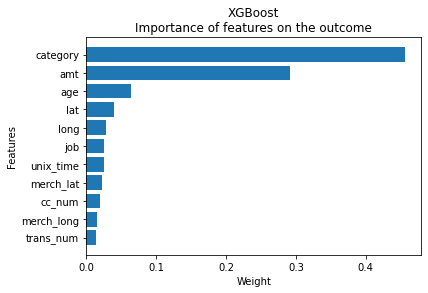

In [50]:
sorted_idx = xgb.feature_importances_.argsort()
plt.barh(selected_features.columns[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.title("XGBoost\nImportance of features on the outcome")
plt.xlabel("Weight", fontsize=10)
plt.ylabel("Features", fontsize=10)
plt.savefig("../static/images/xgb_features.jpg",  bbox_inches='tight')
plt.show

### Gaussian Naïve Bayes Model

In [35]:
from sklearn.naive_bayes import GaussianNB 
gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train)
gnb_prediction = gnb_model.predict(X_test_scaled)

C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [36]:
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, gnb_prediction)*100)

Gaussian Naive Bayes model accuracy(in %): 99.07733311945313


In [37]:
print(f"First 10 Predictions:   {gnb_prediction[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0]
First 10 Actual labels: [[0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]


# Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [39]:
# Confusion Matrix for Gaussian Naive Bayes Model
metrics.confusion_matrix(gnb_prediction, y_test)

tn, fp, fn, tp = confusion_matrix(y_test, gnb_prediction).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  320272
False Positives:  2013
False Negatives:  978
True Positives:  906


In [40]:
# Confusion Matrix for Logistic Regression Model
lr_predicted = logistic_regn_model.predict(X_test_scaled)
cf_matrix = metrics.confusion_matrix(lr_predicted, y_test)

tn, fp, fn, tp = confusion_matrix(y_test, lr_predicted).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  322111
False Positives:  174
False Negatives:  1884
True Positives:  0


In [41]:
import seaborn as sns

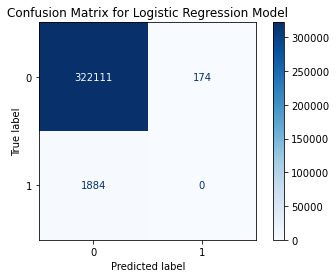

In [42]:
# Plot the confusion matrix chart
class_names =["0","1"]
plot_confusion_matrix(logistic_regn_model, X_test_scaled, y_test,
                                 display_labels=class_names,cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression Model")
plt.savefig("../static/images/cmatrix_logreg.jpg", bbox_inches='tight')
plt.show()

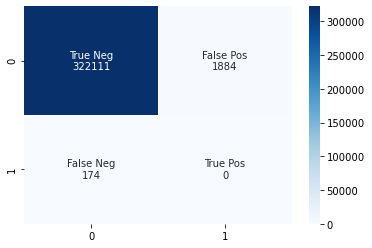

In [43]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

# group_percentages = ["{0:.2%}".format(value) for value in
#                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]


labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels,  fmt='', cmap='Blues')

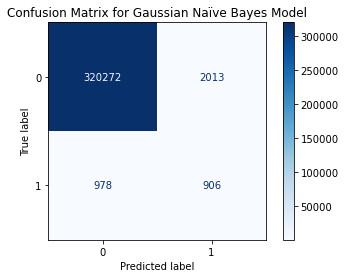

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
class_names =["0","1"]
# plt.figure()
plot_confusion_matrix(gnb_model, X_test_scaled, y_test,
                                 display_labels=class_names,cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Gaussian Naïve Bayes Model")
plt.savefig("../static/images/cmatrix_gnb.jpg", bbox_inches='tight')
plt.show()

## Classification Report

In [45]:
from sklearn.metrics import classification_report

In [46]:
#Classification Report for Gaussian Naïve Bayes 
print(classification_report(y_test, gnb_prediction,
                           target_names=['Genuine','Fraud']))

              precision    recall  f1-score   support

     Genuine       1.00      0.99      1.00    322285
       Fraud       0.31      0.48      0.38      1884

    accuracy                           0.99    324169
   macro avg       0.65      0.74      0.69    324169
weighted avg       0.99      0.99      0.99    324169



In [47]:
#Classification Report for logisitc Regression Model
print(classification_report(y_test, lr_predictions,
                           target_names=['Genuine','Fraud']))

              precision    recall  f1-score   support

     Genuine       0.99      1.00      1.00    322285
       Fraud       0.00      0.00      0.00      1884

    accuracy                           0.99    324169
   macro avg       0.50      0.50      0.50    324169
weighted avg       0.99      0.99      0.99    324169



In [48]:
# save the best trained model- Logistic Regression Model for the flask app
import joblib
filename = 'logistic_regn_model.sav'
joblib.dump(logistic_regn_model, filename)


['logistic_regn_model.sav']

In [49]:
# save the best trained model- Logistic Regression Model for the flask app
import joblib
filename = 'gnb_model.sav'
joblib.dump(gnb_model, filename)

['gnb_model.sav']